In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

In [3]:
iris = load_iris()
x= iris.data
y = iris.target

In [4]:
x.shape

(150, 4)

In [5]:
y.shape

(150,)

In [6]:
x[:,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2)

In [9]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors=6)

In [12]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [13]:
model.score(x_train, y_train)

0.9666666666666667

In [14]:
#Prediction du model
model.predict(x_test)

array([1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1,
       2, 0, 1, 0, 2, 0, 2, 2])

In [15]:
model.score(x_test,y_test)

0.9666666666666667

In [16]:
#Importation du module de cross validation
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(KNeighborsClassifier(9),x_train, y_train, cv=5, scoring='accuracy')

array([0.91666667, 0.95833333, 0.95833333, 0.95833333, 0.95833333])

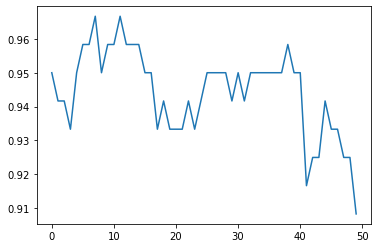

In [18]:
#Nous allons tester notre cross validation sur plusieurs neighbors pour avoir le meilleur k
val_score=[]
for k in range(1,51):
    score=cross_val_score(KNeighborsClassifier(k),x_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
_=plt.plot(val_score)
    

# La courbe de validation : VALIDATION CURVE

In [19]:
from sklearn.model_selection import validation_curve

In [20]:
model = KNeighborsClassifier()
k= np.arange(1,51)
train_score , val_score = validation_curve(model, x_train, y_train, 'n_neighbors',k, cv=5) # Notre hyperparametre est n_neighbors avec cv=5=nbre de decoupe

 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [21]:
val_score

array([[0.91666667, 0.95833333, 0.95833333, 1.        , 0.91666667],
       [0.95833333, 0.95833333, 0.95833333, 1.        , 0.83333333],
       [0.91666667, 0.91666667, 0.95833333, 0.95833333, 0.95833333],
       [0.91666667, 0.95833333, 0.91666667, 0.91666667, 0.95833333],
       [0.91666667, 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [0.91666667, 0.95833333, 0.95833333, 0.95833333, 1.        ],
       [0.91666667, 0.95833333, 0.95833333, 0.95833333, 1.        ],
       [0.95833333, 0.95833333, 0.95833333, 0.95833333, 1.        ],
       [0.91666667, 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [0.91666667, 0.95833333, 0.95833333, 0.95833333, 1.        ],
       [0.91666667, 0.95833333, 0.95833333, 0.95833333, 1.        ],
       [0.95833333, 0.95833333, 0.95833333, 0.95833333, 1.        ],
       [0.91666667, 0.95833333, 0.95833333, 0.95833333, 1.        ],
       [0.91666667, 0.95833333, 0.95833333, 0.95833333, 1.        ],
       [0.91666667, 0.95833333, 0.

In [22]:
val_score.mean(axis = 1)

array([0.95      , 0.94166667, 0.94166667, 0.93333333, 0.95      ,
       0.95833333, 0.95833333, 0.96666667, 0.95      , 0.95833333,
       0.95833333, 0.96666667, 0.95833333, 0.95833333, 0.95833333,
       0.95      , 0.95      , 0.93333333, 0.94166667, 0.93333333,
       0.93333333, 0.93333333, 0.94166667, 0.93333333, 0.94166667,
       0.95      , 0.95      , 0.95      , 0.95      , 0.94166667,
       0.95      , 0.94166667, 0.95      , 0.95      , 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.91666667, 0.925     , 0.925     , 0.94166667,
       0.93333333, 0.93333333, 0.925     , 0.925     , 0.90833333])

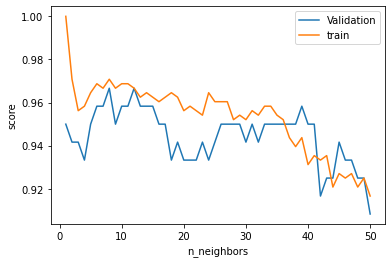

In [23]:
#Affichage de la moyenne des valeures d'entrainement et de validation
_=plt.plot(k, val_score.mean(axis= 1), label = 'Validation')
_=plt.plot(k, train_score.mean(axis=1), label = 'train')
_=plt.ylabel('score')
_=plt.xlabel('n_neighbors')
_=plt.legend()

# GridSearchCv

GridsearchCv nous permet de trouver le modele avec les meilleurs hyperparametres grace à la validation croisée:Cross validation
    

In [24]:
#import du module depuis sklearn
from sklearn.model_selection import GridSearchCV

In [25]:
#on cree les parametres 
param_grid = {'n_neighbors':np.arange(1,20), 'metric':['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid , cv=5)

In [26]:
#Entrainement du model
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [27]:
#Meilleure score
grid.best_score_

0.9666666666666668

In [28]:
#Meilleure estimateur
grid.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [29]:
#Meilleure parametre de notre modele
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 8}

In [30]:
#Sauvegarde de notre modele
model = grid.best_estimator_

In [39]:
#Testons le score de notre nouveau modele avec les donnees de test
model.score(x_test,y_test) # Calcul de r2

1.0

On obtient une precision de 96% sur notre modele

# La matrice de confusion : Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test, model.predict(x_test))

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

# Le learning curve : la courbe d'apprentissage

Les courbes d'apprentissages montrent l'evolution des performances de notre modele en fonction de la quantite de donnees qu'on lui fournit

In [34]:
from sklearn.model_selection import learning_curve

In [35]:
N,train_score, val_score = learning_curve(model,x_train,y_train,train_sizes =np.linspace(0.2 ,1.0,5) , cv=5)

In [36]:
np.linspace(0.2 ,1.0,5)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [37]:
N

array([19, 38, 57, 76, 96])

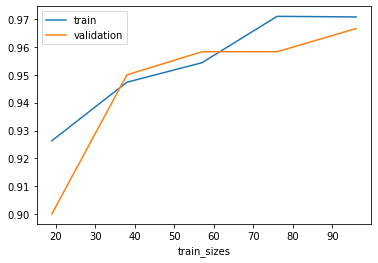

In [38]:
plt.plot(N , train_score.mean(axis=1),label='train')
plt.plot(N , val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()